#Project 1

##Deep Learning-Based Multiclass Classification for Diabetic Retinopathy Detection

Jeeva Jose C,  
      Batch no: 11

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import zipfile
from scipy.stats import skew, kurtosis, entropy
import os

In [ ]:
!unzip '/content/drive/MyDrive/Medical_image_internship/diabetic_retinopathy.zip'

Archive:  /content/drive/MyDrive/Medical_image_internship/diabetic_retinopathy.zip
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/1.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/10.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/100.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/101.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/102.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/103.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/104.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/105.jpg  
  inflating: Dataset_from_fundus_images_for_the_study_of_diabeti

In [ ]:
NODR_path = '/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs'
MIld_path = '/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/2. Mild (or early) NPDR'
Moderate_path ='/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/3. Moderate NPDR'
Severe_path = '/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/4. Severe NPDR'
V_Severe_path ='/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/5. Very Severe NPDR'
PDR_path= '/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/6. PDR'
A_PDR_path = '/content/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/7. Advanced PDR'


In [ ]:
images_names1= os.listdir(NODR_path)
images_names2= os.listdir(MIld_path)
images_names3= os.listdir(Moderate_path)
images_names4= os.listdir(Severe_path)
images_names5= os.listdir(V_Severe_path)
images_names6= os.listdir(PDR_path)
images_names7= os.listdir(A_PDR_path)

In [ ]:
len(images_names1), len(images_names2), len(images_names3), len(images_names4), len(images_names5), len(images_names6), len(images_names7)

(187, 4, 80, 176, 108, 88, 114)

So the classification task focused in No DR,  Severe NPDR,  Very Severe NPDR, A_PDR



In [ ]:
NODR_path[78], Severe_path[78], V_Severe_path[78], A_PDR_path[78]

('1', '4', '5', '7')

In [ ]:
def assigning_label(path):

  images =[]
  labels = []
#/content/extracted_data/train/NRG/EyePACS-NRG-1.jpg
  for i in path:
    for j in sorted(os.listdir(i)):
      image_path= os.path.join(i,j)
      # print(image_path)

      image= np.array(Image.open(image_path))
      image= cv2.resize (image,(256,256))
      # image= image/255.

      images.append(image)
      print(i[78])
      if i[78] == '1':
        labels.append(0)
      elif i[78] == '4':
        labels.append(1)
      elif i[78] == '5':
        labels.append(2)
      else:
        labels.append(3)

  return np.array(images), np.array(labels)

In [ ]:
images, labels= assigning_label([NODR_path, Severe_path, V_Severe_path, A_PDR_path])

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


In [ ]:
from tensorflow.keras.utils import to_categorical

labels=to_categorical(labels,4)

In [ ]:
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
# Step 5: Shuffle
seed = 42
np.random.seed(seed)
indices = np.arange(len(images))
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

In [ ]:
labels

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [ ]:
# Step 6:  normalize
images = images.astype(np.float32) / 255.0

In [ ]:
# First split: 80% train, 20% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)


In [ ]:
# Second split: 50% of 20% → 10% val, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
print("Train set:", X_train.shape, "Labels:", y_train.shape)
print("Validation set:", X_val.shape, "Labels:", y_val.shape)
print("Test set:", X_test.shape, "Labels:", y_test.shape)


Train set: (468, 256, 256, 3) Labels: (468, 4)
Validation set: (58, 256, 256, 3) Labels: (58, 4)
Test set: (59, 256, 256, 3) Labels: (59, 4)


In total there are 585 images

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:


def VGG16_classifying_model():
    inputs = Input(shape=(256, 256, 3))

    conv1 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    conv2 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(conv1)
    max_pool = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(max_pool)
    conv4 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(conv3)
    max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(max_pool2)
    conv6 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(conv5)
    conv7 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(conv6)
    max_pool3 = MaxPooling2D(pool_size=(2, 2))(conv7)

    conv8 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(max_pool3)
    conv9 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv8)
    conv10 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv9)
    conv11 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv10)
    conv12 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv11)
    conv13 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv12)
    conv14 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv13)
    max_pool4 = MaxPooling2D(pool_size=(2, 2))(conv14)

    flatten = Flatten()(max_pool4)  # ✅ Fix: flatten the last layer
    dense = Dense(512, activation='relu')(flatten)
    dense1 = Dense(64, activation='relu')(dense)
    dense2 = Dense(32, activation='relu')(dense1)

    outputs = Dense(4, activation='softmax')(dense2)  # ✅ Fix: 4 output neurons

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
model= VGG16_classifying_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,720,612 (33.27 MB)

 Trainable params: 8,720,612 (33.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_progress = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3384 - loss: 1.3599 - val_accuracy: 0.3103 - val_loss: 1.3644
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - accuracy: 0.3585 - loss: 1.3535 - val_accuracy: 0.3103 - val_loss: 1.3647
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3436 - loss: 1.3531 - val_accuracy: 0.3103 - val_loss: 1.3648
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.3272 - loss: 1.3589 - val_accuracy: 0.3103 - val_loss: 1.3649
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3216 - loss: 1.3644 - val_accuracy: 0.3103 - val_loss: 1.3649
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3061 - loss: 1.3631 - val_accuracy: 0.3103 - val_loss: 1.3649
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3207 - loss: 1.3512 - val_accuracy: 0.3103 - val_loss: 1.3649
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.2852 - loss: 1.3625 - val_accuracy: 0.3

In [ ]:
training_progress = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=2, epochs=20)


Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3363 - loss: 1.3478 - val_accuracy: 0.3103 - val_loss: 1.3644
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3120 - loss: 1.3615 - val_accuracy: 0.3103 - val_loss: 1.3644
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3087 - loss: 1.3593 - val_accuracy: 0.3103 - val_loss: 1.3645
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3380 - loss: 1.3477 - val_accuracy: 0.3103 - val_loss: 1.3645
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3112 - loss: 1.3650 - val_accuracy: 0.3103 - val_loss: 1.3646
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3218 - loss: 1.3517 - val_accuracy: 0.3103 - val_loss: 1.3645
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3310 - loss: 1.3671 - val_accuracy: 0.3103 - val_loss: 1.3645
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2783 - loss: 1.3573 - val_accuracy: 0.

In [ ]:
def alex_classifying_model():
    inputs = Input(shape=(256, 256, 3))

    conv1 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    max_pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(max_pool1)
    max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(max_pool2)
    conv4 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv3)
    conv5 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv4)
    max_pool3 = MaxPooling2D(pool_size=(2, 2))(conv5)

    flatten = Flatten()(max_pool3)  # ✅ Fix here
    dense1 = Dense(128, activation='relu')(flatten)
    dense2 = Dense(64, activation='relu')(dense1)
    outputs = Dense(4, activation='softmax')(dense2)

    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
model2= alex_classifying_model()
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,499,748 (32.42 MB)

 Trainable params: 8,499,748 (32.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_progress = model2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 281ms/step - accuracy: 0.3283 - loss: 1.3640 - val_accuracy: 0.5172 - val_loss: 1.2917
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.5233 - loss: 1.2398 - val_accuracy: 0.5000 - val_loss: 1.1613
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5079 - loss: 1.2513 - val_accuracy: 0.5345 - val_loss: 1.1298
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4795 - loss: 1.1701 - val_accuracy: 0.6552 - val_loss: 1.0918
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5135 - loss: 1.1009 - val_accuracy: 0.5517 - val_loss: 1.0295
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5478 - loss: 1.0855 - val_accuracy: 0.5345 - val_loss: 1.1023
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5999 - loss: 1.0280 - val_accuracy: 0.6207 - val_loss: 1.0192
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5763 - loss: 0.9712 - val_accuracy: 0.6034 - 

In [ ]:
training_progress = model2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=5)


Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.7605 - loss: 0.6051 - val_accuracy: 0.7241 - val_loss: 0.9228
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8314 - loss: 0.4685 - val_accuracy: 0.7069 - val_loss: 0.9652
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8672 - loss: 0.3545 - val_accuracy: 0.7759 - val_loss: 1.1047
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8972 - loss: 0.2910 - val_accuracy: 0.7414 - val_loss: 0.9411
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9233 - loss: 0.2268 - val_accuracy: 0.6724 - val_loss: 1.5042


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to your data if needed (e.g. for ZCA whitening)
datagen.fit(X_train)

# Then train using:
model2.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=20)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - accuracy: 0.5424 - loss: 1.2047 - val_accuracy: 0.6034 - val_loss: 1.0652
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - accuracy: 0.5863 - loss: 1.0054 - val_accuracy: 0.6552 - val_loss: 1.0309
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 438ms/step - accuracy: 0.6165 - loss: 1.0111 - val_accuracy: 0.6552 - val_loss: 0.9372
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 470ms/step - accuracy: 0.5943 - loss: 1.0071 - val_accuracy: 0.6379 - val_loss: 0.9577
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 412ms/step - accuracy: 0.6491 - loss: 0.9022 - val_accuracy: 0.6207 - val_loss: 1.0272
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 489ms/step - accuracy: 0.6496 - loss: 0.8820 - val_accuracy: 0.6724 - val_loss: 0.8513
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.7080 - loss: 0.8309 - val_accuracy: 0.5862 - val_loss: 1.0490
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 515ms/step - accuracy: 0.6087 - loss: 0.9723 - val_accuracy: 0.

In [ ]:
def alex_classifying_model_drop():
    inputs = Input(shape=(256, 256, 3))

    # Convolutional layers
    conv1 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    max_pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(max_pool1)
    max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(max_pool2)
    conv4 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv3)
    conv5 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv4)
    max_pool3 = MaxPooling2D(pool_size=(2, 2))(conv5)

    # Flatten and Fully connected layers
    flatten = Flatten()(max_pool3)
    dense1 = Dense(128, activation='relu')(flatten)
    drop1 = Dropout(0.5)(dense1)  # Dropout to reduce overfitting
    dense2 = Dense(64, activation='relu')(drop1)
    drop2 = Dropout(0.3)(dense2)  # Slightly less aggressive dropout
    outputs = Dense(4, activation='softmax')(drop2)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:



model3= alex_classifying_model_drop()
model3.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,499,748 (32.42 MB)

 Trainable params: 8,499,748 (32.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_progress = model3.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=20)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.2632 - loss: 1.3926 - val_accuracy: 0.2931 - val_loss: 1.4212
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4178 - loss: 1.3435 - val_accuracy: 0.4310 - val_loss: 1.2855
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4637 - loss: 1.2654 - val_accuracy: 0.5172 - val_loss: 1.1948
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4861 - loss: 1.2610 - val_accuracy: 0.5172 - val_loss: 1.1690
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4799 - loss: 1.2489 - val_accuracy: 0.5000 - val_loss: 1.1400
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4907 - loss: 1.2104 - val_accuracy: 0.5000 - val_loss: 1.1287
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5071 - loss: 1.1886 - val_accuracy: 0.5000 - val_loss: 1.1360
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.5275 - loss: 1.1817 - val_accuracy: 0.5345 - 

In [ ]:
training_progress = model3.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5606 - loss: 1.0299 - val_accuracy: 0.5862 - val_loss: 1.0255
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5647 - loss: 1.0377 - val_accuracy: 0.4828 - val_loss: 1.0607
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5934 - loss: 1.0280 - val_accuracy: 0.6207 - val_loss: 0.9315
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6205 - loss: 0.9741 - val_accuracy: 0.5862 - val_loss: 0.9312
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.6279 - loss: 0.9273 - val_accuracy: 0.5862 - val_loss: 0.9885
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.6014 - loss: 0.9960 - val_accuracy: 0.7414 - val_loss: 0.8401
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.6425 - loss: 0.9267 - val_accuracy: 0.7069 - val_loss: 0.8323
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6382 - loss: 0.8889 - val_accuracy: 0.6552 - v

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to your data if needed (e.g. for ZCA whitening)
datagen.fit(X_train)

# Then train using:
model3.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 519ms/step - accuracy: 0.5026 - loss: 1.3368 - val_accuracy: 0.5000 - val_loss: 0.9853
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.5231 - loss: 1.1248 - val_accuracy: 0.5000 - val_loss: 1.0582
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step - accuracy: 0.5451 - loss: 1.1331 - val_accuracy: 0.5517 - val_loss: 1.0490
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 442ms/step - accuracy: 0.5985 - loss: 1.0601 - val_accuracy: 0.5862 - val_loss: 0.9646
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 454ms/step - accuracy: 0.5592 - loss: 1.0911 - val_accuracy: 0.5345 - val_loss: 0.9748
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 458ms/step - accuracy: 0.6218 - loss: 0.9923 - val_accuracy: 0.6034 - val_loss: 0.9578
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.5716 - loss: 1.0921 - val_accuracy: 0.6034 - val_loss: 0.9944
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 512ms/step - accuracy: 0.5620 - loss: 1.0754 - val_accuracy: 0

In [ ]:
model3.fit(datagen.flow(X_train, y_train, batch_size=32),
          validation_data=(X_val, y_val),
          epochs=20)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 524ms/step - accuracy: 0.6243 - loss: 1.0155 - val_accuracy: 0.6207 - val_loss: 0.8503
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.6858 - loss: 0.8465 - val_accuracy: 0.6724 - val_loss: 0.8061
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.6606 - loss: 0.8954 - val_accuracy: 0.5172 - val_loss: 0.8774
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 516ms/step - accuracy: 0.6539 - loss: 0.9547 - val_accuracy: 0.7414 - val_loss: 0.7709
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.6549 - loss: 0.8879 - val_accuracy: 0.6897 - val_loss: 0.8566
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 511ms/step - accuracy: 0.6349 - loss: 0.9868 - val_accuracy: 0.6552 - val_loss: 0.8780
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.6181 - loss: 0.9372 - val_accuracy: 0.6552 - val_loss: 0.9144
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 511ms/step - accuracy: 0.5749 - loss: 0.9589 - val_accuracy: 0

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Final Model

In [ ]:
# Step 1: Define the model

def alex_classifying_model_drop():
    inputs = Input(shape=(256, 256, 3))

    # Convolutional layers
    conv1 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    max_pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(max_pool1)
    max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(max_pool2)
    conv4 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv3)
    conv5 = Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu')(conv4)
    max_pool3 = MaxPooling2D(pool_size=(2, 2))(conv5)

    # Flatten and Fully connected layers
    flatten = Flatten()(max_pool3)
    dense1 = Dense(128, activation='relu')(flatten)
    drop1 = Dropout(0.3)(dense1)  # Dropout to reduce overfitting
    dense2 = Dense(64, activation='relu')(drop1)
    drop2 = Dropout(0.2)(dense2)
    outputs = Dense(4, activation='softmax')(drop2)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model_final= alex_classifying_model_drop()
model_final.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,499,748 (32.42 MB)

 Trainable params: 8,499,748 (32.42 MB)

 Non-trainable params: 0 (0.00 B)

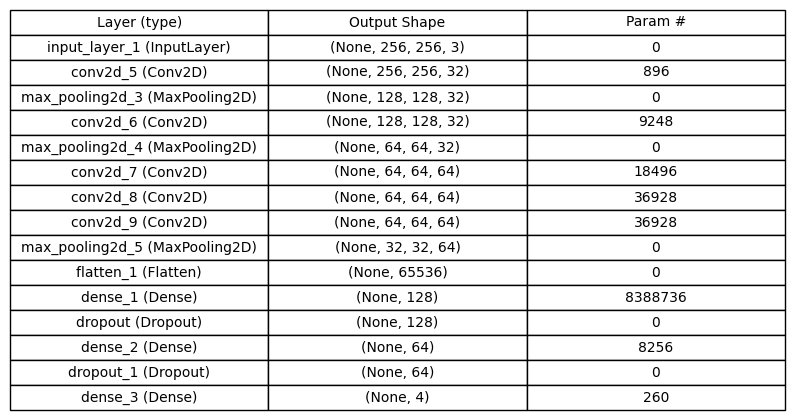

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data = [
    ['input_layer_1 (InputLayer)', '(None, 256, 256, 3)', 0],
    ['conv2d_5 (Conv2D)', '(None, 256, 256, 32)', 896],
    ['max_pooling2d_3 (MaxPooling2D)', '(None, 128, 128, 32)', 0],
    ['conv2d_6 (Conv2D)', '(None, 128, 128, 32)', 9248],
    ['max_pooling2d_4 (MaxPooling2D)', '(None, 64, 64, 32)', 0],
    ['conv2d_7 (Conv2D)', '(None, 64, 64, 64)', 18496],
    ['conv2d_8 (Conv2D)', '(None, 64, 64, 64)', 36928],
    ['conv2d_9 (Conv2D)', '(None, 64, 64, 64)', 36928],
    ['max_pooling2d_5 (MaxPooling2D)', '(None, 32, 32, 64)', 0],
    ['flatten_1 (Flatten)', '(None, 65536)', 0],
    ['dense_1 (Dense)', '(None, 128)', 8388736],
    ['dropout (Dropout)', '(None, 128)', 0],
    ['dense_2 (Dense)', '(None, 64)', 8256],
    ['dropout_1 (Dropout)', '(None, 64)', 0],
    ['dense_3 (Dense)', '(None, 4)', 260],
]

df = pd.DataFrame(data, columns=["Layer (type)", "Output Shape", "Param #"])

fig, ax = plt.subplots(figsize=(10, len(df)*0.3))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
#plt.title('Model Summary Table')
plt.savefig("model_final_summary_table.png", bbox_inches='tight')

plt.show()


In [ ]:
from tensorflow.keras import backend as k


# DC = 2TP/(2TP+FP+FN)

smooth=0.0001
def dice_coef(y_true,y_pred):

  y_true_f = k.flatten(k.cast(y_true, 'float32'))
  y_pred_f = (k.flatten(k.cast(y_pred, 'float32')))

  intersection = k.sum(y_true_f*y_pred_f)
  return (2.*intersection+smooth)/(k.sum(y_true_f)+k.sum(y_pred_f)+smooth)

In [ ]:

def iou_coef(y_true, y_pred):
    smooth = 1e-6
    y_true_f = k.flatten(k.cast(y_true, 'float32'))
    y_pred_f = k.flatten(k.cast(y_pred, 'float32'))
    intersection = k.sum(y_true_f * y_pred_f)
    union = k.sum(y_true_f) + k.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall


In [ ]:
# Step 2: Compile the model
# Use Adam optimizer and sparse_categorical_crossentropy for multi-class classification

model_final.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        Precision(),
        Recall(),
        dice_coef,
        iou_coef
    ]
)




In [ ]:
# Step 3: data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [ ]:
# Step 4: Create a ModelCheckpoint callback
# Saves only the best weights (based on highest validation accuracy)
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/model_final_weights.weights.h5',
    save_best_only=True,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)



In [ ]:
# Step 5: Train the model using augmented data
history=model_final.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.8514 - dice_coef: 0.7427 - iou_coef: 0.5913 - loss: 0.4791 - precision_1: 0.8788 - recall_1: 0.7929
Epoch 1: val_accuracy did not improve from 0.77586
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 512ms/step - accuracy: 0.8519 - dice_coef: 0.7425 - iou_coef: 0.5910 - loss: 0.4777 - precision_1: 0.8793 - recall_1: 0.7924 - val_accuracy: 0.7241 - val_dice_coef: 0.6914 - val_iou_coef: 0.5440 - val_loss: 1.5612 - val_precision_1: 0.7455 - val_recall_1: 0.7069
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.7825 - dice_coef: 0.7352 - iou_coef: 0.5840 - loss: 0.5325 - precision_1: 0.8588 - recall_1: 0.7585
Epoch 2: val_accuracy did not improve from 0.77586
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 488ms/step - accuracy: 0.7835 - dice_coef: 0.7355 - iou_coef: 0.5844 - loss: 0.5325 - precision_1: 0.8590 - recall_1: 0.7593 - val_accuracy: 0.7241 - val_dice_coef: 0.7075 - val_iou_coef: 0.5671 - val_loss: 1.0458 - val_precision_1: 0.7843 

In [ ]:
history.history.keys()


dict_keys(['accuracy', 'dice_coef', 'iou_coef', 'loss', 'precision_1', 'recall_1', 'val_accuracy', 'val_dice_coef', 'val_iou_coef', 'val_loss', 'val_precision_1', 'val_recall_1'])

In [ ]:
# Extract all history keys
history_dict = history.history

# Find best val_accuracy
val_acc = history_dict['val_accuracy']
best_val_acc = max(val_acc)
best_epoch = val_acc.index(best_val_acc)  # zero-based index

# Extract training metrics at that epoch
train_acc = history_dict['accuracy'][best_epoch]
train_loss = history_dict['loss'][best_epoch]
train_dice = history_dict['dice_coef'][best_epoch]
train_iou = history_dict['iou_coef'][best_epoch]
train_precision = history_dict['precision_1'][best_epoch]
train_recall = history_dict['recall_1'][best_epoch]

# Extract validation metrics at that epoch
val_loss = history_dict['val_loss'][best_epoch]
val_dice = history_dict['val_dice_coef'][best_epoch]
val_iou = history_dict['val_iou_coef'][best_epoch]
val_precision = history_dict['val_precision_1'][best_epoch]
val_recall = history_dict['val_recall_1'][best_epoch]

# Now print everything
print(f"🏅 Best Validation Accuracy: {best_val_acc*100:.2f}% at Epoch {best_epoch+1}")

print("\n--- Training Metrics ---")
print(f"Training Accuracy : {train_acc*100:.2f}%")
print(f"Training Loss     : {train_loss:.4f}")
print(f"Training Dice Coefficient : {train_dice:.4f}")
print(f"Training IoU              : {train_iou:.4f}")
print(f"Training Precision        : {train_precision:.4f}")
print(f"Training Recall           : {train_recall:.4f}")

print("\n--- Validation Metrics ---")
print(f"Validation Accuracy : {best_val_acc*100:.2f}%")
print(f"Validation Loss     : {val_loss:.4f}")
print(f"Validation Dice Coefficient : {val_dice:.4f}")
print(f"Validation IoU              : {val_iou:.4f}")
print(f"Validation Precision        : {val_precision:.4f}")
print(f"Validation Recall           : {val_recall:.4f}")


🏅 Best Validation Accuracy: 77.59% at Epoch 97

--- Training Metrics ---
Training Accuracy : 82.26%
Training Loss     : 0.4938
Training Dice Coefficient : 0.7419
Training IoU              : 0.5920
Training Precision        : 0.8756
Training Recall           : 0.7821

--- Validation Metrics ---
Validation Accuracy : 77.59%
Validation Loss     : 0.9650
Validation Dice Coefficient : 0.7035
Validation IoU              : 0.5630
Validation Precision        : 0.8113
Validation Recall           : 0.7414


In [ ]:
# Step 6: Load the best saved weights (after training)
model_final.load_weights('/content/drive/MyDrive/model_final_weights.weights.h5')

In [ ]:
results = model_final.evaluate(X_test, y_test, verbose=1)

# Since you added multiple metrics during compile, the results will be:
# [loss, accuracy, precision, recall, dice_coef, iou_coef]

print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")
print(f"Test Dice Coefficient: {results[4]:.4f}")
print(f"Test IoU Coefficient: {results[5]:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7576 - dice_coef: 0.7155 - iou_coef: 0.5582 - loss: 0.5888 - precision_1: 0.7944 - recall_1: 0.7246
Test Loss: 0.6332
Test Accuracy: 0.7458
Test Precision: 0.7778
Test Recall: 0.7119
Test Dice Coefficient: 0.7032
Test IoU Coefficient: 0.5435


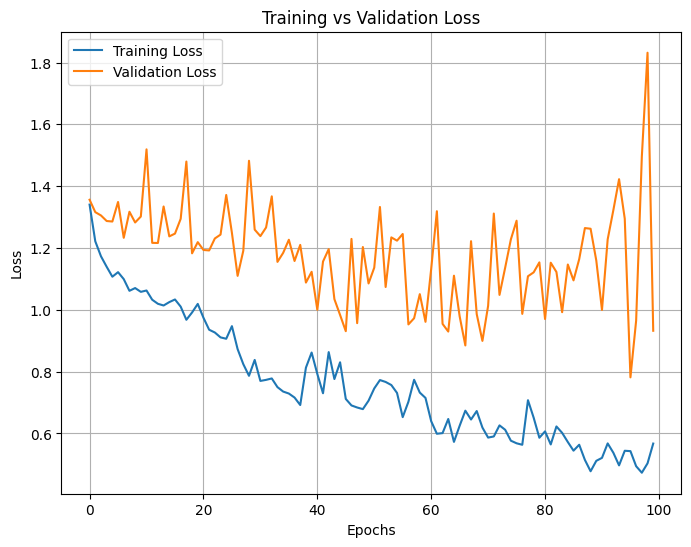

In [ ]:

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot
plt.figure(figsize=(8,6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
